In [61]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator as operator

In [63]:
election_day = pd.read_csv('./detroit-election-day.txt')
avcb = pd.read_csv('./detroit-avcb.txt')
city_name = 'Detroit'

In [64]:
#This is not the real total votes as only data for trump and biden are included in the spreadsheet
election_day['total_votes'] = (
    election_day['biden'] +
    election_day['trump'] 
    )
avcb['total_votes'] = (
    avcb['biden'] +
    avcb['trump'] 
)   
election_day['trump_percent'] = election_day['trump'] / election_day['total_votes']*100
avcb['trump_percent'] = avcb['trump'] / avcb['total_votes']*100


In [65]:
avcb_trump_percent = avcb['trump_percent'].tolist()
election_day_trump_percent = election_day['trump_percent'].tolist()
biden_election_day = election_day['biden'].tolist()
biden_avcb = avcb['biden'].tolist()
# trump_delta_percent = president['trump_delta_percent'].tolist()
# biden_delta_percent = president['biden_delta_percent'].tolist()
# cutoff = 56.5


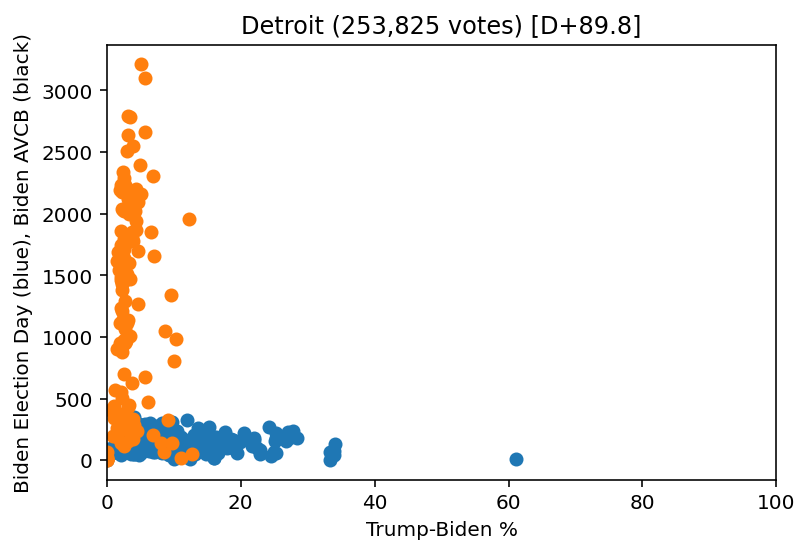

Trump: 12889, Biden: 240936


In [66]:
def addSlopeLine(xset, yset, color, cutoff,op):
    slope_points_x = []
    slope_points_y = []

    for index, value in enumerate(xset):
        if op(value,cutoff):
            slope_points_x.append(value)
            slope_points_y.append(yset[index])  

    m, b = np.polyfit(slope_points_x, slope_points_y, 1)
    x = np.array(slope_points_x)
    plt.plot(x, m*x + b, color=color, label=f'slope: {round(m, 3)}')

plt.scatter(
    election_day_trump_percent,
    biden_election_day
)
plt.scatter(
    avcb_trump_percent,
    biden_avcb
)

plt.xlim([0,100])
#plt.ylim([-50,100])
plt.xlabel('Trump-Biden %')
plt.ylabel('Biden Election Day (blue), Biden AVCB (orange)')
#plt.axvline(x=0.2, color='red', linestyle='dotted')

#addSlopeLine(trump_percent, biden_delta_percent, 'blue', cutoff, operator.ge)
#addSlopeLine(trump_percent, biden_delta_percent, 'blue', cutoff, operator.le)
#addSlopeLine(trump_percent, biden_delta_percent, 'black', 0.0, operator.ge)

#plt.legend(loc=0)

total_votes = election_day['total_votes'].sum() + avcb['total_votes'].sum()
trump_total = election_day['trump'].sum() + avcb['trump'].sum()
trump_percent = trump_total / total_votes
biden_total = election_day['biden'].sum() + avcb['biden'].sum()
biden_percent = biden_total / total_votes


if trump_percent > biden_percent:
    margin = 'R+' + "{:.1f}".format((trump_percent - biden_percent)*100)
else:
    margin = 'D+' + "{:.1f}".format((biden_percent - trump_percent)*100)

plt.title('{0} ({1} votes) [{2}]'.format(city_name, "{:,}".format(total_votes), margin))
plt.show()

print("Trump: {0}, Biden: {1}".format(trump_total, biden_total))